# Detecting Fake Job Postings
by: Veronica Bayani and Ell June Abucay



#### Fake Job Description Prediction
This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

This file is taken at Kaggle: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

## Loading Libraries

In [66]:
#installing a new library
!pip install outlier_utils
!pip install outliers
!pip install wordcloud
!pip install xgboost

In [62]:
!pip install imbalanced-learn 
# sudo pip install imbalanced-learn (macos/linux)
# pip install delayed (only do this if required)

In [1]:
# allows us to ignore warnings, since they are just warnings 
import warnings
warnings.filterwarnings('ignore')

# allows us to print things in jupyter in a pretty way
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# import pandas to be able to use dataframes
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# import plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# allow inline plotting on notebook cells
%matplotlib inline
plt.switch_backend('agg')

# allow to create better graphs
import seaborn as sns

# we'll get access to the numpy library
import numpy as np

# We'll use a label encoder to convert categorical feature to numerical values
from sklearn.preprocessing import LabelEncoder

# Access to the localoutlierfactor for clustering
from sklearn.neighbors import LocalOutlierFactor

# allows us to implement a train test split strategy
from sklearn.model_selection import train_test_split

# access to the logistic regression class of Sklearn
from sklearn.linear_model import LogisticRegression

# access to the neural network model MLP Classifier
from sklearn.neural_network import MLPClassifier

# classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# for use with CAP report
from scipy import integrate

# feature power transformation functions
from scipy.stats import boxcox
from scipy.special import boxcox1p

# normality tests
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import probplot

# pip install imbalanced-learn (open anaconda prompt as admin)
# sudo pip install imbalanced-learn (macos/linux)
# pip install delayed (only do this if required)
# This module is used for handling imbalanced data
from imblearn.over_sampling import SMOTE

# Collections is a core python module. We wille use counter only for reporting
from collections import Counter

import pandas as pd #data processing
import numpy as np #linear_algebra
import matplotlib.pyplot as plt #visual
import seaborn as sns #visual
import warnings

warnings.filterwarnings('ignore')
#Handling text 
import nltk
nltk.download('stopwords')
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS


#machine learning preprocessing & classification models
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score,accuracy_score,classification_report,plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DepEd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
#Importing the dataset from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
data_df = pd.read_csv('c:/Users/DepEd/Documents/PMDSA/Stat 208/fake_job_postings.csv')

In [3]:
data_df.shape

(17880, 18)

In [4]:
data_df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


### Data Description:

This file contains the dataset of job descriptions and their meta information. A small proportion of these descriptions are fake or scam which can be identified by the column "fraudulent".

    * job_id - Unique job ID
    * title - the title of the job ad entry
    * location  - geographical location of the job ad
    * department - corporate department (e.g. sales)
    * salary_range - indicative salary range (e.g. $50,000 - $60,000)
    * company_profile - a brief company description
    * description - the details description of the job ad
    * requirements - enlisted requirements for the job opening
    * benefits - enlisted offered benefits by the employer
    * telecommuting - true for telecommuting positions
    * has_company_logo - true if company logo is present
    * has_questions - true if screening questions are present
    * employment_type - full time, part time, contract, etc
    * required_experience - executive, entry level, intern, etc.
    * required_education - doctorate, master's degree, bachelor, etc.
    * industry - automotive, IT, healthcare, real estate, etc.
    * function - consulting, engineering, research, sales, etc.
    * fraudulent - the target classification attribute
    

In [5]:
data_df['fraudulent'].value_counts().to_frame()

,fraudulent
0,17014
1,866


Text(0.5, 1.0, 'Count Plot of the Fraudulent and Non-Fraudulent Jobs')

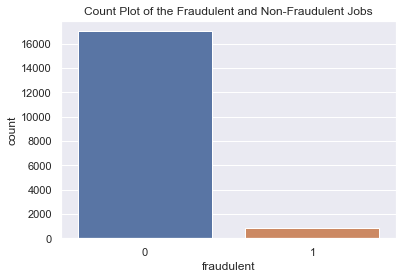

In [6]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x="fraudulent", data=data_df)
ax.set_title("Count Plot of the Fraudulent and Non-Fraudulent Jobs")

In [7]:
print("percentage of data with class a 0: ",data_df['fraudulent'].value_counts()[0] /data_df.shape[0] *100)
print("percentage of data with class a 1: ",data_df['fraudulent'].value_counts()[1] /data_df.shape[0] *100)

percentage of data with class a 0:  95.1565995525727
percentage of data with class a 1:  4.8434004474272925


### Data Structure

In [8]:
# Let us check the number of nulls in our job postings

data_df.shape[0] - data_df.dropna(axis = 0).shape[0]

17106

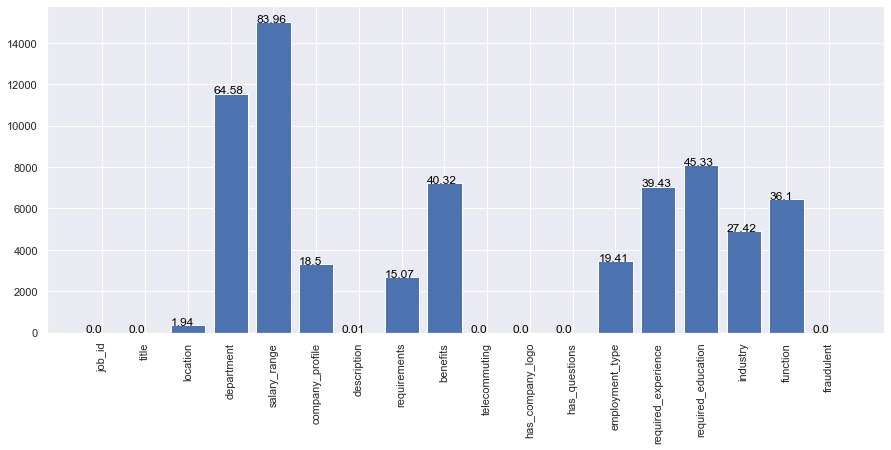

In [9]:
import matplotlib.pyplot as plt
total= data_df.isnull().sum()
missing_percent =  data_df.isnull().sum()* 100 / len(data_df)
missing_data = pd.concat([total,missing_percent],axis=1,keys=['Total','Percentage'])
f,ax = plt.subplots(figsize=(15,6))
xlocs=plt.xticks(rotation='90')
bars = plt.bar(missing_data.index,missing_data['Total'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, round((yval*100)/len(data_df),2), color='black')

In [10]:
# Let us check the number of duplicated job postings

data_df.duplicated().sum()

0

In [11]:
# Since we have no duplicated job postings, we will now drop job_id.

data_df.drop('job_id', axis = 1, inplace = True)
data_df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [12]:
data_df.dtypes.to_frame()

,0
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64
has_company_logo,int64


In [13]:
categories=['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','fraudulent']

for i in categories:
     x=data_df[i].value_counts()
     print (x.to_frame())
    

   telecommuting
0          17113
1            767
   has_company_logo
1             14220
0              3660
   has_questions
0           9088
1           8792
           employment_type
Full-time            11620
Contract              1524
Part-time              797
Temporary              241
Other                  227
                  required_experience
Mid-Senior level                 3809
Entry level                      2697
Associate                        2297
Not Applicable                   1116
Director                          389
Internship                        381
Executive                         141
                                   required_education
Bachelor's Degree                                5145
High School or equivalent                        2080
Unspecified                                      1397
Master's Degree                                   416
Associate Degree                                  274
Certification                                   

### Data Manipulation

In [84]:
# Let us check the number of null values for each variable
data_df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [85]:
#Removing undesired column & nan 
data_df.function.fillna(data_df.department,inplace=True)
data_df.drop(columns=['department'],inplace=True)


In [86]:
# Imputing nulls in 'location' variable#Now we need to handle missing values for text data and categorical data

text=['title','benefits','company_profile','location','description','requirements','fraudulent']

categ=['employment_type','required_experience','required_education','industry','function','telecommuting','has_company_logo','has_questions','fraudulent']


In [87]:
#filling nan in categorical data
categ_cols=data_df[categ].fillna('None')
categ_cols

,employment_type,required_experience,required_education,industry,function,telecommuting,has_company_logo,has_questions,fraudulent
0,Other,Internship,None,None,Marketing,0,1,0,0
1,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0,1,0,0
2,None,None,None,None,None,0,1,0,0
3,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,0,0
4,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1,1,0
...,...,...,...,...,...,...,...,...,...
17875,Full-time,Mid-Senior level,None,Computer Software,Sales,0,1,1,0
17876,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,1,1,0
17877,Full-time,None,None,None,None,0,0,0,0
17878,Contract,Not Applicable,Professional,Graphic Design,Design,0,0,1,0


In [88]:
#filling nan in text data
txt_cols=data_df[text].fillna(' ')
txt_cols

,title,benefits,company_profile,location,description,requirements,fraudulent
0,Marketing Intern,,"We're Food52, and we've created a groundbreaki...","US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0
1,Customer Service - Cloud Video Production,What you will get from usThrough being part of...,"90 Seconds, the worlds Cloud Video Production ...","NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0
2,Commissioning Machinery Assistant (CMA),,Valor Services provides Workforce Solutions th...,"US, IA, Wever","Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0
3,Account Executive - Washington DC,Our culture is anything but corporate—we have ...,Our passion for improving quality of life thro...,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,Bill Review Manager,Full Benefits Offered,SpotSource Solutions LLC is a Global Human Cap...,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0
...,...,...,...,...,...,...,...
17875,Account Director - Distribution,What can you expect from us?We have an open cu...,Vend is looking for some awesome new talent to...,"CA, ON, Toronto",Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,0
17876,Payroll Accountant,Health &amp; WellnessMedical planPrescription ...,WebLinc is the e-commerce platform and service...,"US, PA, Philadelphia",The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,0
17877,Project Cost Control Staff Engineer - Cost Con...,,We Provide Full Time Permanent Positions for m...,"US, TX, Houston",Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,0
17878,Graphic Designer,Competitive salary (compensation will be based...,,"NG, LA, Lagos",Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,0


In [89]:
# Let us check again the number of null values for each variable
data_df.isna().sum()

job_id                     0
title                      0
location                 346
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                4903
fraudulent                 0
dtype: int64

In [20]:
# Let's get the country names for each location

categ_cols['country']=txt_cols['location'].apply(lambda x:x.split(',')[0])
countries=categ_cols['country'].value_counts().to_frame()
countries

,country
US,10656
GB,2384
GR,940
CA,457
DE,383
...,...
SI,1
CO,1
SD,1
UG,1


([<matplotlib.patches.Wedge at 0x235809dc340>,
 [Text(-1.0872905906487755, 0.16673083544034975, 'Real Job'),
  Text(1.0872905828435406, -0.16673088634009564, 'Fake Job')],
 [Text(-0.593067594899332, 0.09094409205837257, '95.2%'),
  Text(0.5930675906419312, -0.09094411982187034, '4.8%')])

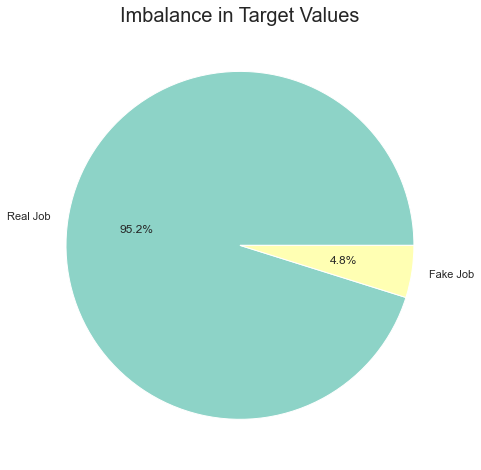

In [21]:
colors = sns.color_palette('Set3')[0:10]
labels=['Real Job','Fake Job']
plt.figure(figsize=(10,8))
plt.title('Imbalance in Target Values',size=20)
sns.set_style('whitegrid')
plt.pie(data_df['fraudulent'].value_counts(), labels=labels, colors=colors, autopct='%.1f%%')

In [22]:
fakejobs=categ_cols[categ_cols['fraudulent']==1]
realjobs=categ_cols[categ_cols['fraudulent']==0]

Text(0.5, 0, 'Function')

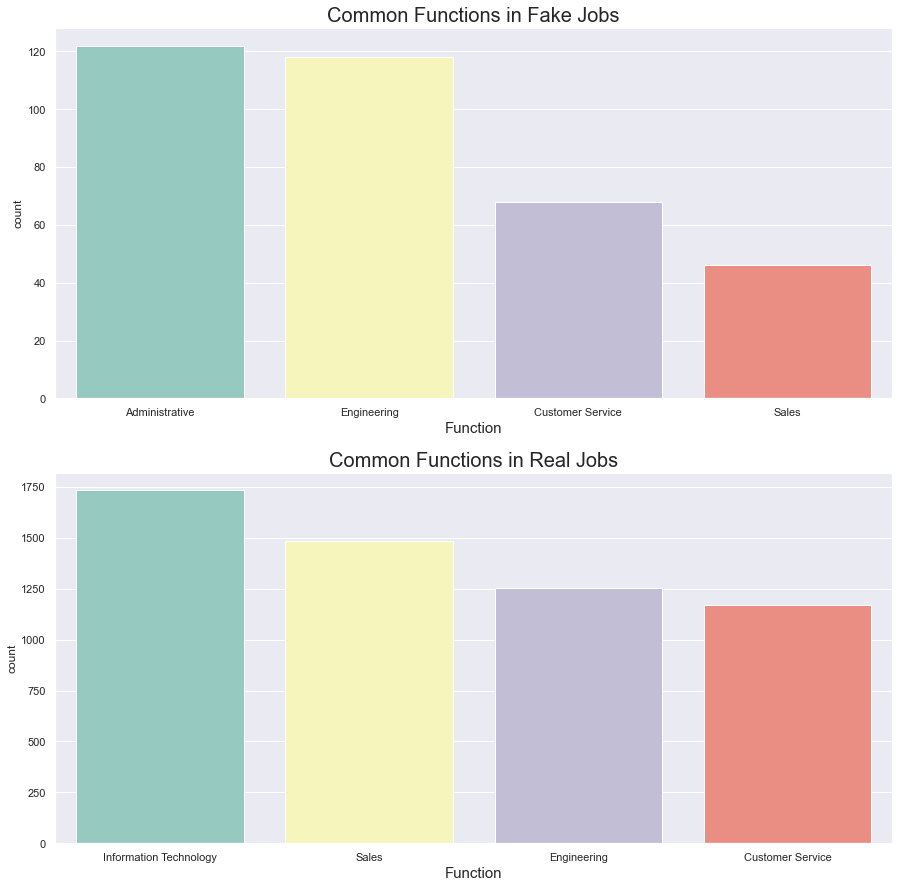

In [23]:
sns.set_style('darkgrid')
fig,axes=plt.subplots(nrows = 2, ncols = 1, figsize=(15,15))
sns.countplot(fakejobs['function'],palette='Set3',order = fakejobs['function'].value_counts()[1:5].index,ax=axes[0])
sns.countplot(realjobs['function'],palette='Set3',order = realjobs['function'].value_counts()[1:5].index,ax=axes[1])
axes[0].set_title('Common Functions in Fake Jobs',fontsize=20)
axes[1].set_title('Common Functions in Real Jobs',fontsize=20)
axes[0].set_xlabel('Function', fontsize = 15)
axes[1].set_xlabel('Function', fontsize = 15)

### Top Industries Requiring Experience

In [24]:
exp_list=['Executive','Associate','Mid-Senior level']
exp_data=categ_cols.loc[categ_cols['required_experience'].isin(exp_list)]
exp_data_indus=exp_data.groupby('industry')['required_experience'].value_counts(ascending=False).to_frame()
exp_data_indus.head(30)

required_experience
industry                        required_experience                     
Accounting                      Associate                             25
                                Mid-Senior level                      14
                                Executive                              1
Airlines/Aviation               Mid-Senior level                      23
                                Associate                             10
                                Executive                              3
Animation                       Associate                              1
Apparel & Fashion               Mid-Senior level                      36
                                Associate                              9
Architecture & Planning         Mid-Senior level                       3
                                Associate                              2
Automotive                      Mid-Senior level                      32
                                Associate                             21
                                Executive                              1
Aviation & Aerospace            Mid-Senior level                       8
                                Associate                              5
Banking                         Associate                             32
                                Mid-Senior level                      29
                                Executive                              1
Biotechnology                   Associate                             14
                                Mid-Senior level                      11
Broadcast Media                 Mid-Senior level                      43
                                Associate                              4
Building Materials              Associate                              8
                                Mid-Senior level                       3
Business Supplies and Equipment Mid-Senior level                       5
                                Associate                              4
Capital Markets                 Mid-Senior level                       3
Chemicals                       Mid-Senior level                      16
                                Associate                              1

### Countries with Employment Type

In [25]:
categ_cols.groupby('country')['employment_type'].value_counts(ascending=False).to_frame().head(50)

employment_type
country employment_type                 
        None                         214
        Full-time                     96
        Part-time                     14
        Contract                      12
        Other                          8
        Temporary                      2
AE      Full-time                     34
        None                          20
AL      None                           1
AM      Full-time                      2
AR      None                           5
        Full-time                      4
AT      None                           7
        Full-time                      6
        Contract                       1
AU      Full-time                    136
        Part-time                     37
        None                          28
        Contract                       6
        Other                          4
        Temporary                      3
BD      Full-time                      2
BE      Full-time                    107
        None                           5
        Temporary                      3
        Other                          2
BG      Full-time                     17
BH      None                           9
BR      Full-time                     27
        None                           6
        Contract                       2
        Other                          1
BY      Full-time                      5
        None                           4
CA      Full-time                    300
        None                          78
        Contract                      43
        Part-time                     30
        Other                          4
        Temporary                      2
CH      Full-time                     13
        None                           1
        Other                          1
CL      None                           2
CM      Full-time                      1
CN      Full-time                     10
        Contract                       3
        None                           2
CO      None                           1
CY      None                           6

In [69]:
# Creating new variable separating the salary ranges. Null values are replaced with 0.

for idx in (data_df['salary_range'].dropna()).index :
    Range = data_df.at[idx , 'salary_range'].split('-')
    try :
        start = int(Range[0])
        if start < 1000 :
            data_df.at[idx ,'salary_range' ] = 0
        else :
            data_df.at[idx ,'salary_range' ] = start
            
    except ValueError :
        data_df.at[idx ,'salary_range' ] = 0
        
data_df['salary_range'] = data_df['salary_range'].fillna(0) 

In [27]:
data_df

,title,location,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",0,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",0,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",0,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [90]:
# Now, let's manipulate the industry and function. We will create a variable named job_field

data_df[['industry' , 'function']] = data_df[['industry' , 'function']].fillna('')
data_df['job_field'] = data_df['title'] +' '+ data_df['industry'] +' '+ data_df['function']
data_df.drop(['title','industry','function'] , axis = 1 , inplace = True)
data_df

,job_id,location,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent,job_field
0,1,"US, NY, New York",NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,0,Marketing Intern Marketing
1,2,"NZ, , Auckland",NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,0,Customer Service - Cloud Video Production Mark...
2,3,"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,0,Commissioning Machinery Assistant (CMA)
3,4,"US, DC, Washington",NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0,Account Executive - Washington DC Computer Sof...
4,5,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,Bill Review Manager Hospital & Health Care Hea...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,"CA, ON, Toronto",NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,0,Account Director - Distribution Computer Soft...
17876,17877,"US, PA, Philadelphia",NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0,Payroll Accountant Internet Accounting/Auditing
17877,17878,"US, TX, Houston",NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,0,Project Cost Control Staff Engineer - Cost Con...
17878,17879,"NG, LA, Lagos",NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,0,Graphic Designer Graphic Design Design


In [91]:
data_df[['employment_type','required_experience','required_education']] = data_df[['employment_type','required_experience','required_education']].fillna('Others')


In [92]:
# Let us check again the number of null values for each variable
data_df.isna().sum()

job_id                     0
location                 346
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type            0
required_experience        0
required_education         0
fraudulent                 0
job_field                  0
dtype: int64

In [93]:
# Combine requirements, required_experience and required_education into one variable, thus reducing the number of variables in the dataframe.
data_df['Requirements'] = data_df['requirements'] +' ' + data_df['required_experience'] +' ' + data_df['required_education']
data_df.drop(['requirements','required_experience','required_education'],axis =  1 ,inplace = True )

In [94]:
data_df[['benefits']] = data_df[['benefits']].fillna('Others')
data_df

,job_id,location,salary_range,company_profile,description,benefits,telecommuting,has_company_logo,has_questions,employment_type,fraudulent,job_field,Requirements
0,1,"US, NY, New York",NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Others,0,1,0,Other,0,Marketing Intern Marketing,Experience with content management systems a m...
1,2,"NZ, , Auckland",NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What you will get from usThrough being part of...,0,1,0,Full-time,0,Customer Service - Cloud Video Production Mark...,What we expect from you:Your key responsibilit...
2,3,"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Others,0,1,0,Others,0,Commissioning Machinery Assistant (CMA),Implement pre-commissioning and commissioning ...
3,4,"US, DC, Washington",NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,Our culture is anything but corporate—we have ...,0,1,0,Full-time,0,Account Executive - Washington DC Computer Sof...,"EDUCATION: Bachelor’s or Master’s in GIS, busi..."
4,5,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,Full Benefits Offered,0,1,1,Full-time,0,Bill Review Manager Hospital & Health Care Hea...,QUALIFICATIONS:RN license in the State of Texa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,"CA, ON, Toronto",NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,What can you expect from us?We have an open cu...,0,1,1,Full-time,0,Account Director - Distribution Computer Soft...,To ace this role you:Will eat comprehensive St...
17876,17877,"US, PA, Philadelphia",NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,0,Payroll Accountant Internet Accounting/Auditing,- B.A. or B.S. in Accounting- Desire to have f...
17877,17878,"US, TX, Houston",NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,Others,0,0,0,Full-time,0,Project Cost Control Staff Engineer - Cost Con...,At least 12 years professional experience.Abil...
17878,17879,"NG, LA, Lagos",NaN,NaN,Nemsia Studios is looking for an experienced v...,Competitive salary (compensation will be based...,0,0,1,Contract,0,Graphic Designer Graphic Design Design,1. Must be fluent in the latest versions of Co...


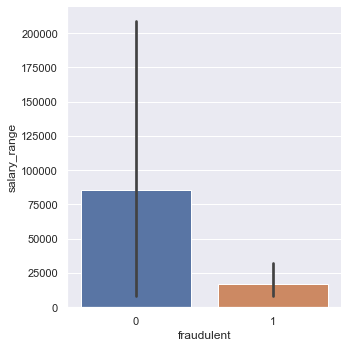

In [33]:
sns.catplot(data=data_df, x='fraudulent', y='salary_range', kind='bar')

In [95]:
data_df[['location' , 'company_profile', 'Requirements']] = data_df[['location' , 'company_profile', 'Requirements']].fillna('Others')

### Text Processing

In [96]:
stemmer=PorterStemmer()
stop=set(stopwords.words('english'))

In [97]:
def column_clean(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z\s*]','',text)
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    return (text)

In [98]:
# Splitting Text Data to Fraud or Not Fraud
txt_fraud=txt_cols[txt_cols['fraudulent']==1]
txt_not_fraud=txt_cols[txt_cols['fraudulent']==0]

In [99]:
txt_fraud['title']=txt_fraud['title'].apply(column_clean)
txt_not_fraud['title']=txt_not_fraud['title'].apply(column_clean)

In [100]:
def combine(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

fraud_titles = txt_fraud['title'].apply(combine)
not_fraud_titles = txt_not_fraud['title'].apply(combine)

In [101]:
# To List

fraud_titles_corpus = fraud_titles.values.tolist()
not_fraud_titles_corpus=not_fraud_titles.values.tolist()


fraud_titles_corpus=' '.join(fraud_titles_corpus)
not_fraud_titles_corpus=' '.join(not_fraud_titles_corpus)

Text(0.5, 1.0, 'Real Titles Lengths')

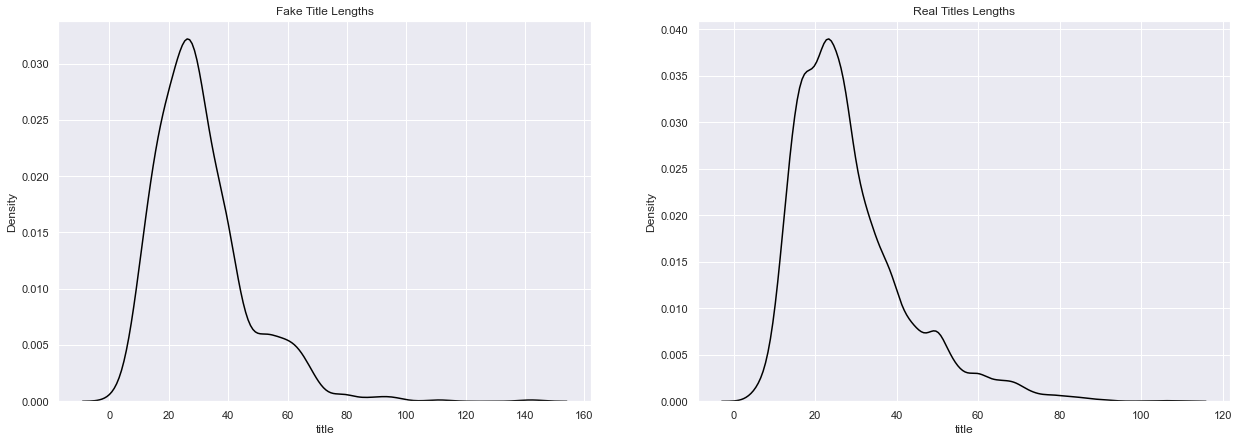

In [46]:
fraud_title_length=txt_cols[txt_cols["fraudulent"]==1]['title'].str.len()
not_fraud_title_length=txt_cols[txt_cols["fraudulent"]==0]['title'].str.len()

fig,axes=plt.subplots(1,2,figsize=(21,7))
sns.kdeplot(fraud_title_length,ax=axes[0],color='black') 
sns.kdeplot(not_fraud_title_length,ax=axes[1],color='black') 

axes[0].set_title('Fake Title Lengths',fontsize=12)
axes[1].set_title('Real Titles Lengths',fontsize=12)

### Most Common Job Titles which are Fraudulent

In [47]:
fraud_titles.value_counts(ascending=False).to_frame().head(10)

,title
administr assist,24
home base payrol typistdata entri clerk posit avail,21
cruis staff want *urgent*,21
data entri admincler posit work home,21
custom servic repres,19
home base payrol data entri clerk posit earn daili,12
payrol clerk,11
data entri,11
payrol data coordin posit earn daili,10
account sale manag yr,10


### Most Common Job Titles that are NOT Fraudulent

In [48]:
not_fraud_titles.value_counts(ascending=False).to_frame().head(10)

,title
english teacher abroad,406
custom servic associ,198
graduat english teacher abroad convers,144
custom servic associ part time,95
softwar engin,93
account manag,84
english teacher abroad convers,83
project manag,78
web develop,73
product manag,61


In [49]:
### Final Dataset

data_df.head()

,location,salary_range,company_profile,description,benefits,telecommuting,has_company_logo,has_questions,employment_type,fraudulent,job_field,Requirements
0,"US, NY, New York",0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Others,0,1,0,Other,0,Marketing Intern Marketing,Experience with content management systems a m...
1,"NZ, , Auckland",0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What you will get from usThrough being part of...,0,1,0,Full-time,0,Customer Service - Cloud Video Production Mark...,What we expect from you:Your key responsibilit...
2,"US, IA, Wever",0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Others,0,1,0,Others,0,Commissioning Machinery Assistant (CMA),Implement pre-commissioning and commissioning ...
3,"US, DC, Washington",0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,Our culture is anything but corporate—we have ...,0,1,0,Full-time,0,Account Executive - Washington DC Computer Sof...,"EDUCATION: Bachelor’s or Master’s in GIS, busi..."
4,"US, FL, Fort Worth",0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,Full Benefits Offered,0,1,1,Full-time,0,Bill Review Manager Hospital & Health Care Hea...,QUALIFICATIONS:RN license in the State of Texa...


In [50]:
## Let's check again for duplicates

def get_duplicate_feature_names(feature_names):
    unique_names = set()
    duplicates = set()
    for name in feature_names:
        if name in unique_names:
            duplicates.add(name)
        else:
            unique_names.add(name)
    return duplicates

# Example usage:
duplicate_names = get_duplicate_feature_names(data_df)
if duplicate_names:
    print("Duplicate feature names found:", duplicate_names)
else:
    print("All feature names are unique.")

All feature names are unique.


# Predicting Outcomes

## Logistic Regression

As our base model we will use a simple logistic regression as our starting point for developing our predictive model.

In [102]:
# Applying Count Vectorizer

count_vec = CountVectorizer(max_features=5000)
vec = count_vec.fit_transform(data_df['benefits'])

In [103]:
benefits=pd.DataFrame(vec.toarray(),columns=count_vec.get_feature_names_out())

In [104]:
labels=pd.get_dummies(x.drop(columns='benefits'))
result = pd.concat([labels, benefits], axis=1)

In [105]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [108]:
# Splitting data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [109]:
# we keep the column names to be used later
columns = x.columns 

# Base model using all variables
logreg_model = LogisticRegression(random_state=0)

# Let's input our training data set and fit our model
logreg_model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [110]:
# predict against x_test
y_pred = logreg_model.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [111]:
# Let's save our results in a variable for later use
y_pred_lr = y_pred

In [142]:
# How did our logistic regression perform?

print("accuracy: ",accuracy_score(y_test,y_pred_lr))
print("precision_score: ",precision_score(y_test,y_pred_lr))
print("recall_score: ",recall_score(y_test,y_pred_lr))
print("F1_score: ",f1_score(y_test,y_pred_lr))
print("roc auc: " ,roc_auc_score(y_test,y_pred_lr))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_lr)

accuracy:  0.6097560975609756
precision_score:  0.5953020134228187
recall_score:  0.69296875
F1_score:  0.6404332129963899
roc auc:  0.6095026497101591
confusion matrix: 


array([[2677, 2412],
       [1572, 3548]], dtype=int64)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.610


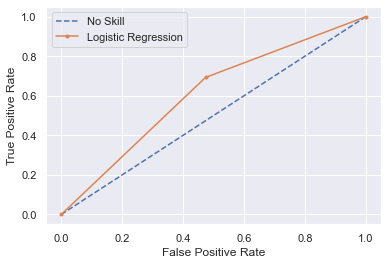

In [113]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_lr
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Neural Network

As our base model we will use a simple logistic regression as our starting point for developing our predictive model.


In [114]:
%%time 

# Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.



nn_model = MLPClassifier(random_state=0)

nn_model.fit(x_train, y_train)

CPU times: total: 22.5 s
Wall time: 5.7 s


MLPClassifier(random_state=0)

In [115]:
# predict against x_test
y_pred = nn_model.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [116]:
# Let's save our results in a variable for later use
y_pred_nn = y_pred

In [143]:
# How did our neural network model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_nn))
print("precision_score: ",precision_score(y_test,y_pred_nn))
print("recall_score: ",recall_score(y_test,y_pred_nn))
print("F1_score: ",f1_score(y_test,y_pred_nn))
print("roc auc: " ,roc_auc_score(y_test,y_pred_nn))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_nn)

accuracy:  0.7599177196591242
precision_score:  0.7394581015610981
recall_score:  0.8048828125
F1_score:  0.7707846254559058
roc auc:  0.7597807656526332
confusion matrix: 


array([[3637, 1452],
       [ 999, 4121]], dtype=int64)

## Multinomial and Gaussian Naive Bayes

In [118]:
# Multinomial Naive Bayes

nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)

In [144]:
# How did our multinomial naive bayes model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_nb))
print("precision_score: ",precision_score(y_test,y_pred_nb))
print("recall_score: ",recall_score(y_test,y_pred_nb))
print("F1_score: ",f1_score(y_test,y_pred_nb))
print("roc auc: " ,roc_auc_score(y_test,y_pred_nb))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_nb)

accuracy:  0.49191889509256537
precision_score:  0.49640904705756245
recall_score:  0.9044921875
F1_score:  0.6410132189078829
roc auc:  0.49066228553620556
confusion matrix: 


array([[ 391, 4698],
       [ 489, 4631]], dtype=int64)

In [120]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)

In [145]:
# How did our Gaussian naive bayes model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_gnb))
print("precision_score: ",precision_score(y_test,y_pred_gnb))
print("recall_score: ",recall_score(y_test,y_pred_gnb))
print("F1_score: ",f1_score(y_test,y_pred_gnb))
print("roc auc: " ,roc_auc_score(y_test,y_pred_gnb))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_gnb)

accuracy:  0.5025957488490548
precision_score:  0.5020608439646712
recall_score:  0.99921875
F1_score:  0.6683213585891574
roc auc:  0.5010831419483199
confusion matrix: 


array([[  15, 5074],
       [   4, 5116]], dtype=int64)

## KNN

In [122]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [146]:
# How did our KNN model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_knn))
print("precision_score: ",precision_score(y_test,y_pred_knn))
print("recall_score: ",recall_score(y_test,y_pred_knn))
print("F1_score: ",f1_score(y_test,y_pred_knn))
print("roc auc: " ,roc_auc_score(y_test,y_pred_knn))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_knn)

accuracy:  0.936722499755118
precision_score:  0.8899930264993027
recall_score:  0.9970703125
F1_score:  0.940493736182756
roc auc:  0.936538693290676
confusion matrix: 


array([[4458,  631],
       [  15, 5105]], dtype=int64)

## Random Forest

In [124]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [147]:
# How did our Random Forest model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_rf))
print("precision_score: ",precision_score(y_test,y_pred_rf))
print("recall_score: ",recall_score(y_test,y_pred_rf))
print("f1_score: ",f1_score(y_test,y_pred_rf))
print("roc auc: " ,roc_auc_score(y_test,y_pred_rf))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_rf)

accuracy:  0.9871681849348614
precision_score:  0.9865418373317729
recall_score:  0.987890625
f1_score:  0.9872157704694057
roc auc:  0.9871659845377284
confusion matrix: 


array([[5020,   69],
       [  62, 5058]], dtype=int64)

## Ensemble Learning

### Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [127]:
%%time 

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)

CPU times: total: 4.75 s
Wall time: 4.87 s


In [148]:
# How did our GBC model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_gbc))
print("precision_score: ",precision_score(y_test,y_pred_gbc))
print("recall_score: ",recall_score(y_test,y_pred_gbc))
print("F1_score: ",f1_score(y_test,y_pred_gbc))
print("roc auc: " ,roc_auc_score(y_test,y_pred_gbc))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_gbc)

accuracy:  0.930845332549711
precision_score:  0.9267208043310131
recall_score:  0.9361328125
F1_score:  0.9314030314807616
roc auc:  0.9308292280224504
confusion matrix: 


array([[4710,  379],
       [ 327, 4793]], dtype=int64)

### Adaboost

In [129]:
%%time 

ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred_ada=ada.predict(x_test)

CPU times: total: 1.48 s
Wall time: 1.49 s


In [149]:
# How did our adaboost model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_ada))
print("precision_score: ",precision_score(y_test,y_pred_ada))
print("recall_score: ",recall_score(y_test,y_pred_ada))
print("F1_score: ",f1_score(y_test,y_pred_ada))
print("roc auc: " ,roc_auc_score(y_test,y_pred_ada))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_ada)

accuracy:  0.8985209129199726
precision_score:  0.9118596208148447
recall_score:  0.8830078125
F1_score:  0.8972018257590791
roc auc:  0.8985681624889468
confusion matrix: 


array([[4652,  437],
       [ 599, 4521]], dtype=int64)

## Revised Neural Network

In [134]:
feature_columns = data_df.columns[:-1]  # Exclude the last column which is the target variable
feature_names = list(feature_columns)
target_column = data_df.columns[-1]
importances = gbc.feature_importances_

# Print feature names and importances
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

job_id: 0.15717451287894438
location: 0.08269274389518842
salary_range: 0.040397681967328514
company_profile: 0.06472429115978832
description: 0.05553983257939737
benefits: 0.04936628230463668
telecommuting: 0.0007216192483075909
has_company_logo: 0.44914636558507814
has_questions: 0.03430840275633327
employment_type: 0.011556787198894846
fraudulent: 0.0068788810246029715
job_field: 0.047492599401499434


In [137]:

# Let's remove the features and create our revised train test dataset
revised_x = x.drop(['telecommuting', 'has_questions', 'employment_type'], axis=1)
revised_x_train, revised_x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [138]:
%%time 

# Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

revised_nn_model = MLPClassifier(random_state=0)

revised_nn_model.fit(revised_x_train, y_train)

CPU times: total: 22.8 s
Wall time: 5.79 s


MLPClassifier(random_state=0)

In [139]:
# predict against X_test
y_pred = revised_nn_model.predict(revised_x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [150]:
# Let's save our results in a variable for later use
y_pred_revised_nn = y_pred

# How did our revised neural network model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_revised_nn))
print("precision_score: ",precision_score(y_test,y_pred_revised_nn))
print("recall_score: ",recall_score(y_test,y_pred_revised_nn))
print("F1_score: ",f1_score(y_test,y_pred_revised_nn))
print("roc auc: " ,roc_auc_score(y_test,y_pred_revised_nn))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_revised_nn)

accuracy:  0.7599177196591242
precision_score:  0.7394581015610981
recall_score:  0.8048828125
F1_score:  0.7707846254559058
roc auc:  0.7597807656526332
confusion matrix: 


array([[3637, 1452],
       [ 999, 4121]], dtype=int64)

## Summary of the Accuracy, Precision, Recall and ROC AUC for the different models

In [151]:
import pandas as pd

# Create a dictionary to store the model metrics
model_metrics = {
    'Model': ['Linear Regression', 'Neural Network', 'Multinomial Naive Bayes', 'Gaussian Naive Bayes', 'KNN', 
              'Random Forest', 'Revised Neural Network', 'Gradient Boosting', 'Adaboost'],
    'Accuracy': [accuracy_score(y_test,y_pred_lr), accuracy_score(y_test,y_pred_nn), accuracy_score(y_test,y_pred_nb),
                accuracy_score(y_test,y_pred_gnb), accuracy_score(y_test,y_pred_knn), accuracy_score(y_test,y_pred_rf),
                accuracy_score(y_test,y_pred_revised_nn), accuracy_score(y_test,y_pred_gbc), 
                 accuracy_score(y_test,y_pred_ada)],
    'Precision': [precision_score(y_test,y_pred_lr), precision_score(y_test,y_pred_nn), precision_score(y_test,y_pred_nb),
                 precision_score(y_test,y_pred_gnb), precision_score(y_test,y_pred_knn), precision_score(y_test,y_pred_rf),
                 precision_score(y_test,y_pred_revised_nn), precision_score(y_test,y_pred_gbc), 
                  precision_score(y_test,y_pred_ada)],
    'Recall': [recall_score(y_test,y_pred_lr), recall_score(y_test,y_pred_nn), recall_score(y_test,y_pred_nb), 
              recall_score(y_test,y_pred_gnb), recall_score(y_test,y_pred_knn), recall_score(y_test,y_pred_rf),
              recall_score(y_test,y_pred_revised_nn), recall_score(y_test,y_pred_gbc),
              recall_score(y_test,y_pred_ada)],
    'F1 Score': [f1_score(y_test,y_pred_lr), f1_score(y_test,y_pred_nn), f1_score(y_test,y_pred_nb), 
              f1_score(y_test,y_pred_gnb), f1_score(y_test,y_pred_knn), f1_score(y_test,y_pred_rf),
              f1_score(y_test,y_pred_revised_nn), f1_score(y_test,y_pred_gbc),
              f1_score(y_test,y_pred_ada)],
    'ROC AUC': [roc_auc_score(y_test,y_pred_lr), roc_auc_score(y_test,y_pred_nn), roc_auc_score(y_test,y_pred_nb), 
               roc_auc_score(y_test,y_pred_gnb), roc_auc_score(y_test,y_pred_knn), roc_auc_score(y_test,y_pred_rf),
               roc_auc_score(y_test,y_pred_revised_nn), roc_auc_score(y_test,y_pred_gbc), roc_auc_score(y_test,y_pred_ada)]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(model_metrics)

# Apply formatting and styling to the DataFrame
formatted_df = metrics_df.style.set_properties(**{'text-align': 'center'}) \
    .background_gradient(cmap='Blues', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']) \
    .set_caption('Model Performance Metrics')

# Display the formatted DataFrame
display(formatted_df)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Linear Regression,0.609756,0.595302,0.692969,0.640433,0.609503
1,Neural Network,0.759918,0.739458,0.804883,0.770785,0.759781
2,Multinomial Naive Bayes,0.491919,0.496409,0.904492,0.641013,0.490662
3,Gaussian Naive Bayes,0.502596,0.502061,0.999219,0.668321,0.501083
4,KNN,0.936722,0.889993,0.997070,0.940494,0.936539
5,Random Forest,0.987168,0.986542,0.987891,0.987216,0.987166
6,Revised Neural Network,0.759918,0.739458,0.804883,0.770785,0.759781
7,Gradient Boosting,0.930845,0.926721,0.936133,0.931403,0.930829
8,Adaboost,0.898521,0.911860,0.883008,0.897202,0.898568


## Post-Hoc Analyses

### Lorenz Curve

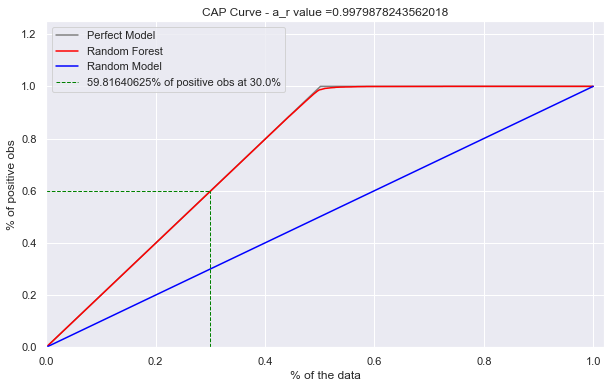

In [153]:
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    #print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.3
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.subplots(nrows = 1, ncols = 1)

    
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='Random Forest')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    plt.show()

    
# Let's store the pred probability for use later when we call the CAP function
revised_y_pred_proba = rf.predict_proba(X=x_test)

# Let's cal lthe cap curve function. What does this is pass the y_test (which contains our target classification
# as well as the predicted probabilities. The intention is to chart our CAP and see what is the optimal approach to 
# acting on our scored transaction list 
capcurve(y_test,revised_y_pred_proba[:,1])

In [154]:
save_whitelist_df = x_test.copy() # Let's create a dataframe of the test dataset
save_whitelist_df['y_pred_proba'] = revised_y_pred_proba[:,1] # store the probability to be a fraud case
save_whitelist_df['y_pred'] = y_pred_nn # add the predictions of our random forest
save_whitelist_df = save_whitelist_df.sort_values('y_pred_proba',ascending=False) # sort with highest to lowest probability

In [155]:
# Let's get our cut off and filter to the final list and save to a CSV File

percentage = .29 # Let's use 49% since based on the chart we already hit the optimal cutoff before 30%
cutoff = int(save_whitelist_df.shape[0]*percentage) # will get the absolute count of 29% of total rows
print("Our cutoff value is ", cutoff)
save_whitelist_df = save_whitelist_df[0:cutoff] # we filter until the cutoff
save_whitelist_df.to_csv("fraud_rf.csv") # Filter only to the predicted and save our CSV file
print("We predict ",save_whitelist_df['y_pred'].sum(), " fraud cases out of ", x_test.shape[0], " transactions.")
save_whitelist_df.head()

Our cutoff value is  2960
We predict  2660  fraud cases out of  10209  transactions.


,job_id,location,salary_range,company_profile,description,benefits,telecommuting,has_company_logo,has_questions,employment_type,job_field,Requirements,y_pred_proba,y_pred
30138,17605,2165,0,1709,13319,545,0,0,0,3,5647,2441,1.000000,1
26758,5497,443,0,1709,12038,4517,0,0,0,3,5646,8031,1.000000,1
19585,1572,2049,0,1709,1089,3260,0,0,0,1,1630,12240,1.000000,1
28811,5461,2503,0,1502,13388,4877,0,1,0,1,710,3757,1.000000,1
18178,17610,2080,0,1206,8217,3260,0,0,0,2,9362,7289,1.000000,1


### Partial Dependence Plots (PDP)

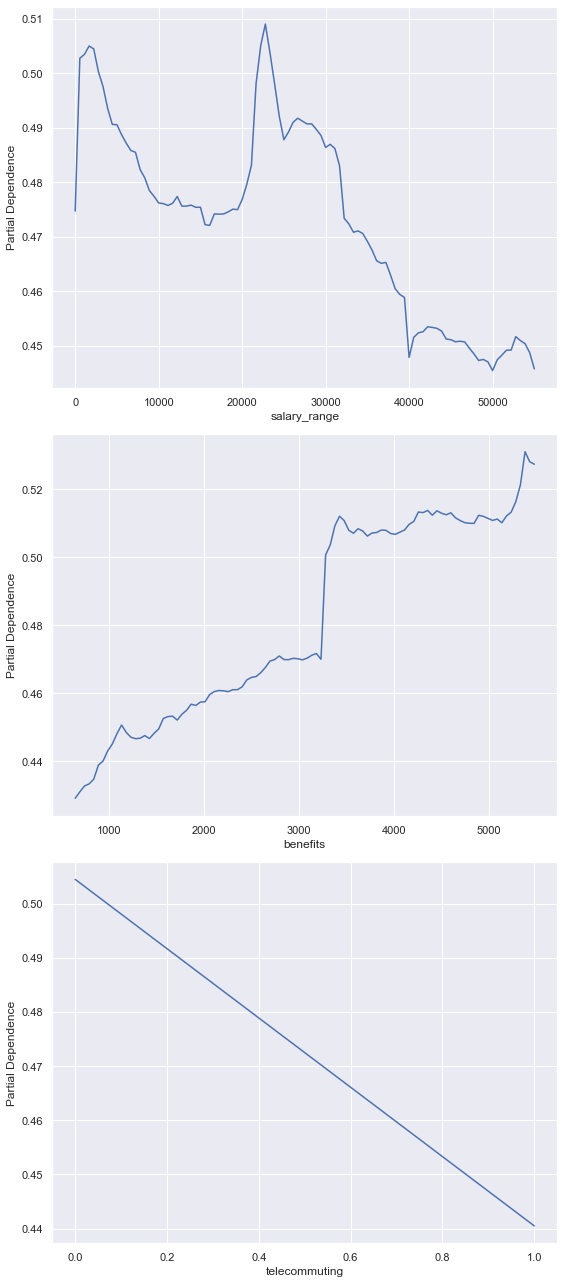

In [159]:
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt

# Select the feature(s) for which you want to create the PDP(s)
features = [2, 5, 6]  # salary range and benefits

fig, ax = plt.subplots(len(features), 1, figsize=(8, 6 * len(features)))

# Create PDPs for each selected feature
for i, feature in enumerate(features):
    pdp, axes = partial_dependence(rf, x, features=[feature], grid_resolution=100)
    ax[i].plot(axes[0], pdp[0])
    ax[i].set_xlabel(feature_names[feature])
    ax[i].set_ylabel('Partial Dependence')

plt.tight_layout()
plt.show()

## Conclusion

Considering the imbalanced nature of data, this study would like to look more on F1 score. The F1 score is particularly useful when the dataset is imbalanced, meaning there is a significant difference in the number of instances between the positive and negative classes. In such cases, accuracy alone can be misleading, as a high accuracy can be achieved by simply predicting the majority class for all instances. The F1 score takes into account both precision and recall, providing a more comprehensive evaluation of the model's performance.Since we conducted SMOTE for oversampling, we will be looking more on ROC AUC indicator. 

After careful deliberation, we decided to use Random Forest as the best machine learning technique to classify fraudulent recruitment from non-fraudulent ones. The Random Forest model topped all our metrics except for recall where KNN had the best result. 

Further posthoc analysis through partial dependence plots showed that recruitment fraud has a negative relationship with salary range. When the salary range is over $35,000, it is very likely that the job opportunity is legitimate. Furthermore, there is a plateauing effect from $10,000 to $20,000 salary range threshold. The PDP levels off or plateaus, indicating that further increases in salary range may not have a significant impact on the probability that the opportunity is fraudulent.